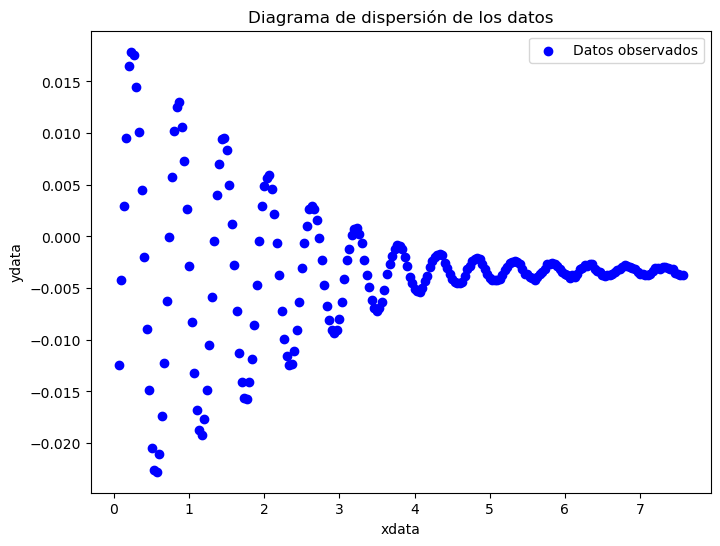

Estadísticas descriptivas de ydata:
Media: -3.352e-03
Mediana: -3.218e-03
Desviación estándar: 6.327e-03
Cuartil 25% (Q1): -4.494e-03
Cuartil 75% (Q3): -2.090e-03


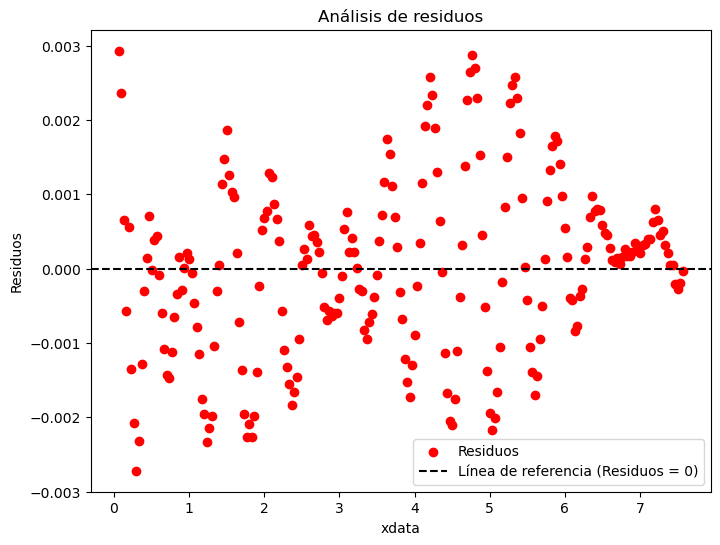

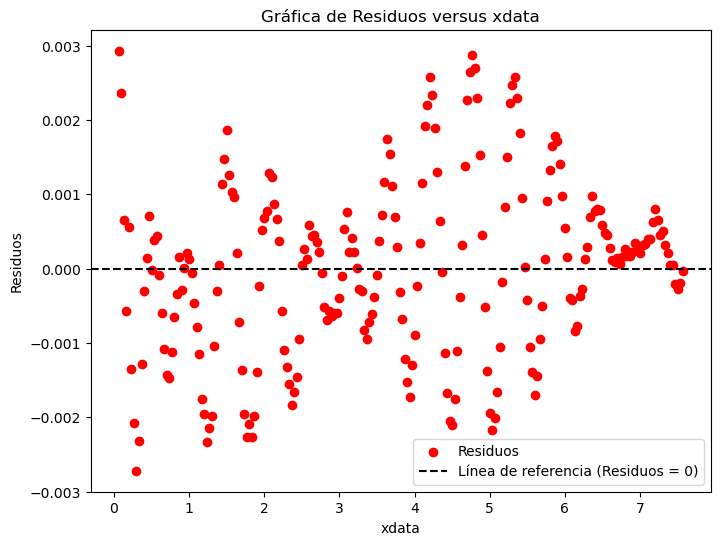

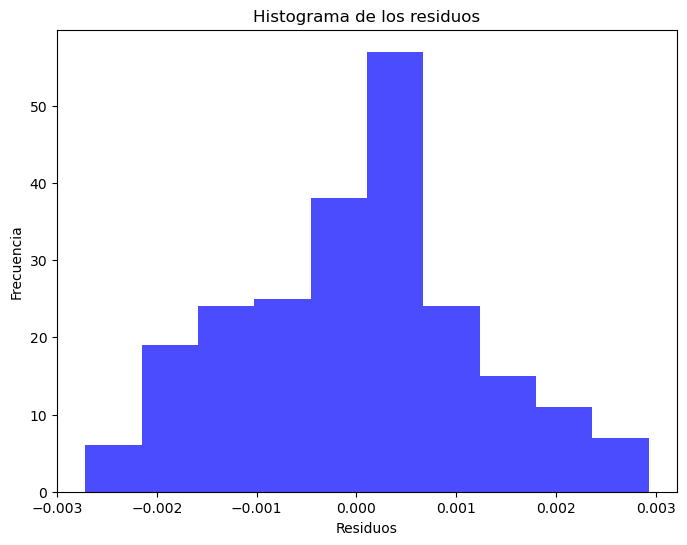

In [2]:
import matplotlib.pyplot as plt
import numpy as np

ruta_archivo = 'U1.txt'
data = np.loadtxt(ruta_archivo)

# Datos observados
xdata = data[:, 0]
ydata = data[:, 1]
yerr = 0.0001

# 1. Exploración visual de los datos: Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, marker='o', color='blue', label='Datos observados')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.title('Diagrama de dispersión de los datos')
plt.legend()
plt.show()

# 2. Estadísticas descriptivas
mean_y = np.mean(ydata)
median_y = np.median(ydata)
std_y = np.std(ydata)
q1_y, q3_y = np.percentile(ydata, [25, 75])

print(f"Estadísticas descriptivas de ydata:")
print(f"Media: {mean_y:.3e}")
print(f"Mediana: {median_y:.3e}")
print(f"Desviación estándar: {std_y:.3e}")
print(f"Cuartil 25% (Q1): {q1_y:.3e}")
print(f"Cuartil 75% (Q3): {q3_y:.3e}")

# 3. Valores extremos o datos faltantes (ejemplo: agregando datos atípicos)
ydata_with_outlier = np.append(ydata, 10.0)

# 4. Tratamiento de valores atípicos o faltantes (ejemplo: eliminando valores atípicos)
ydata_cleaned = ydata[ydata < 5.0]

# 5. Escalado de datos (ejemplo: normalización de ydata)
ydata_normalized = (ydata - np.min(ydata)) / (np.max(ydata) - np.min(ydata))

# 6. Validación cruzada (ejemplo: dividir datos en conjuntos de entrenamiento y prueba)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

# 7. Análisis de residuos (ejemplo con datos aleatorios)
ydata_pred = 0.02710019* np.exp(-0.56364229 * xdata) * np.sin(10.5532234 * xdata -7.45290879) -0.00361252
residuals = ydata - ydata_pred

plt.figure(figsize=(8, 6))
plt.scatter(xdata, residuals, marker='o', color='red', label='Residuos')
plt.axhline(y=0, color='black', linestyle='--', label='Línea de referencia (Residuos = 0)')
plt.xlabel('xdata')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')
plt.legend()
plt.show()

# Función del modelo (función verdadera)
def true_model(x, a, b, c, d, e):
    return a * np.exp(-b * x) * np.sin(c * x + d) + e

# Valores de los parámetros ajustados mediante MCMC
a_fit = 0.02710019
b_fit = 0.56364229
c_fit = 10.5532234
d_fit = -7.45290879
e_fit = -0.00361252

# Calcula ydata_pred utilizando los valores ajustados de los parámetros
ydata_pred = true_model(xdata, a_fit, b_fit, c_fit, d_fit, e_fit)

# Gráfica de residuos versus xdata
residuals = ydata - ydata_pred

plt.figure(figsize=(8, 6))
plt.scatter(xdata, residuals, marker='o', color='red', label='Residuos')
plt.axhline(y=0, color='black', linestyle='--', label='Línea de referencia (Residuos = 0)')
plt.xlabel('xdata')
plt.ylabel('Residuos')
plt.title('Gráfica de Residuos versus xdata')
plt.legend()
plt.show()

# Histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, color='blue', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los residuos')
plt.show()
